# SNPlentiful - correlations with number of SNPs per gene

In [12]:
import pandas
import numpy
import matplotlib.pyplot
import seaborn

%matplotlib inline

In [4]:
# Read gene connectivity degrees
degree_df = pandas.read_table('data/gene-degrees.tsv.gz')
degree_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree
0,1,A1BG,gene::1,gene - association - disease,0
1,1,A1BG,gene::1,gene > knockdown upregulation > gene,0


In [7]:
# Randomly calculate dummy SNPs per gene
snp_count_df = pandas.DataFrame({'entrez_gene_id': degree_df.entrez_gene_id.unique()})
snp_count_df['snps'] = numpy.random.poisson(lam=5, size=len(snp_count_df))

In [15]:
long_df = degree_df.merge(snp_count_df)
long_df['degree_log'] = numpy.log10(1 + long_df.degree)
long_df.head(2)

,entrez_gene_id,symbol,node,metaedge,degree,snps,degree_log
0,1,A1BG,gene::1,gene - association - disease,0,1,0
1,1,A1BG,gene::1,gene > knockdown upregulation > gene,0,1,0


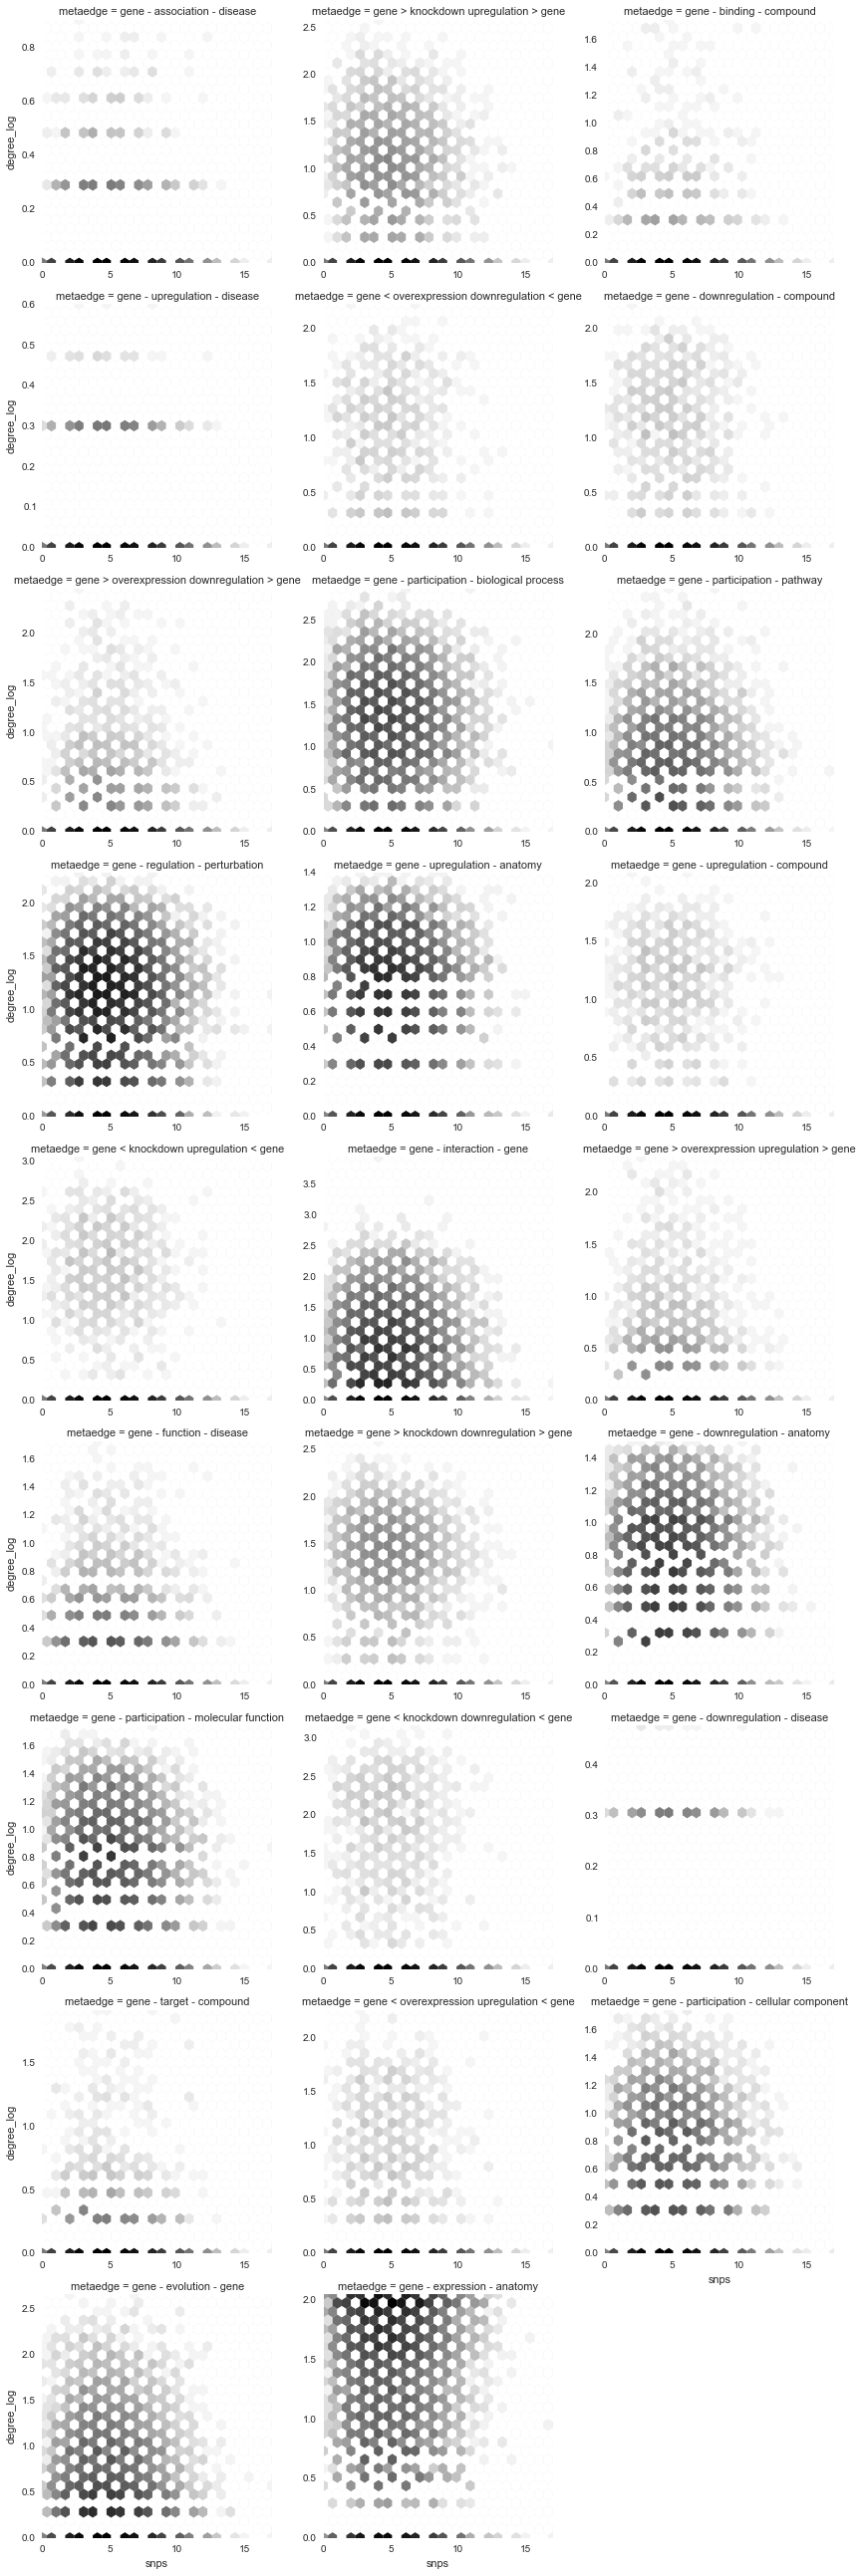

In [22]:
# Plot degree versus number of SNPs per gene
grid = seaborn.FacetGrid(long_df, col='metaedge', col_wrap=3, sharex=False, sharey=False, size=4)
grid.map(matplotlib.pyplot.hexbin, 'snps', 'degree_log', gridsize=25, linewidths=0, bins='log');